## Baseball Case Study

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm 
that predicts the number of wins for a given team in the 2015 season based on several different 
indicators of success. There are 16 different features that will be used as the inputs to the machine 
learning and the output will be a value that represents the number of wins. 

Dataset Link

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score

## Data Collection

In [101]:
baseball_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
baseball_df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Observation:
            1. Predict number of wins ('W') for a given baseball team is a continous data so this is a 
               Regression problem.
            2. Number of samples are very less.            

## Exploratory Data Analysis

In [102]:
baseball_df.shape

(30, 17)

In [103]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [104]:
baseball_df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [105]:
baseball_df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation:
            1. No null values in any columns

## check for any blank records

In [106]:
for i in baseball_df.columns:
    print(baseball_df.loc[baseball_df[i] == ' '])

Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E]
Index: []
Empty DataFrame
Columns: [W, R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SH

Observation:
            1. checked all 17 columns but none have any blank values

## check the duplicate values in rows

In [107]:
baseball_df.shape

(30, 17)

In [108]:
baseball_df.duplicated().sum()

0

In [109]:
baseball_df.shape

(30, 17)

Observation:
            1. No duplicate values in any of the rows.

## Number of uniques values in each column 

In [110]:
baseball_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [111]:
baseball_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. Looks like there are quite more number of outliers

## Data Visualization

In [112]:
# seperating numerical and categorical columns

cat_col = []
for i in baseball_df.dtypes.index:
    if baseball_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in baseball_df.dtypes.index:
    if baseball_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column []


Numerical Column ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']


Observation:
            1. All the variables have numerical data and no categorical data

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


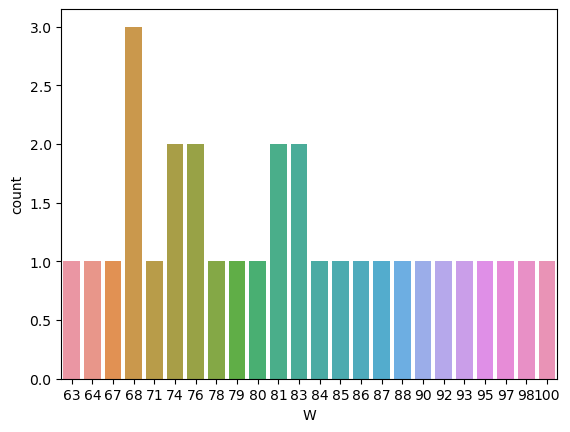

In [113]:
# Univariate Analysis

sns.countplot(x = 'W', data = baseball_df)
print(baseball_df.W.value_counts())

Observation:
            1. number of wins 68 are 3

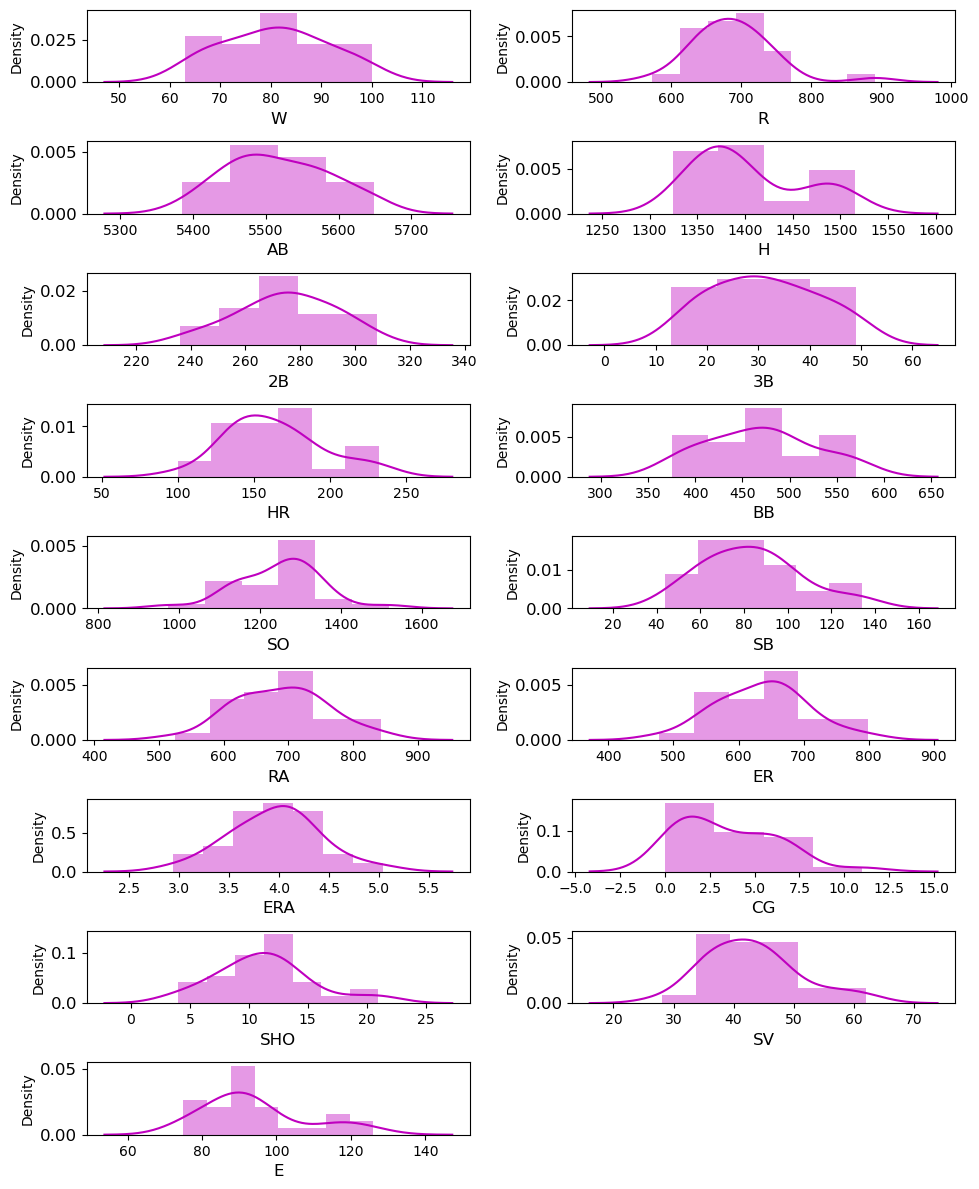

In [114]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10,12))
p = 1
for i in num_col:
    if p <= 17:
        ax = plt.subplot(9, 2, p)
        sns.distplot(baseball_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data like 'R', 'H', 'HR', 'SO', 'SB','ER', 'CG', 'SHO', 'SV', 'E'are not
               well normally distributed. 
            2. There are outliers
            3. we need to deal with skewness in the data 

In [115]:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

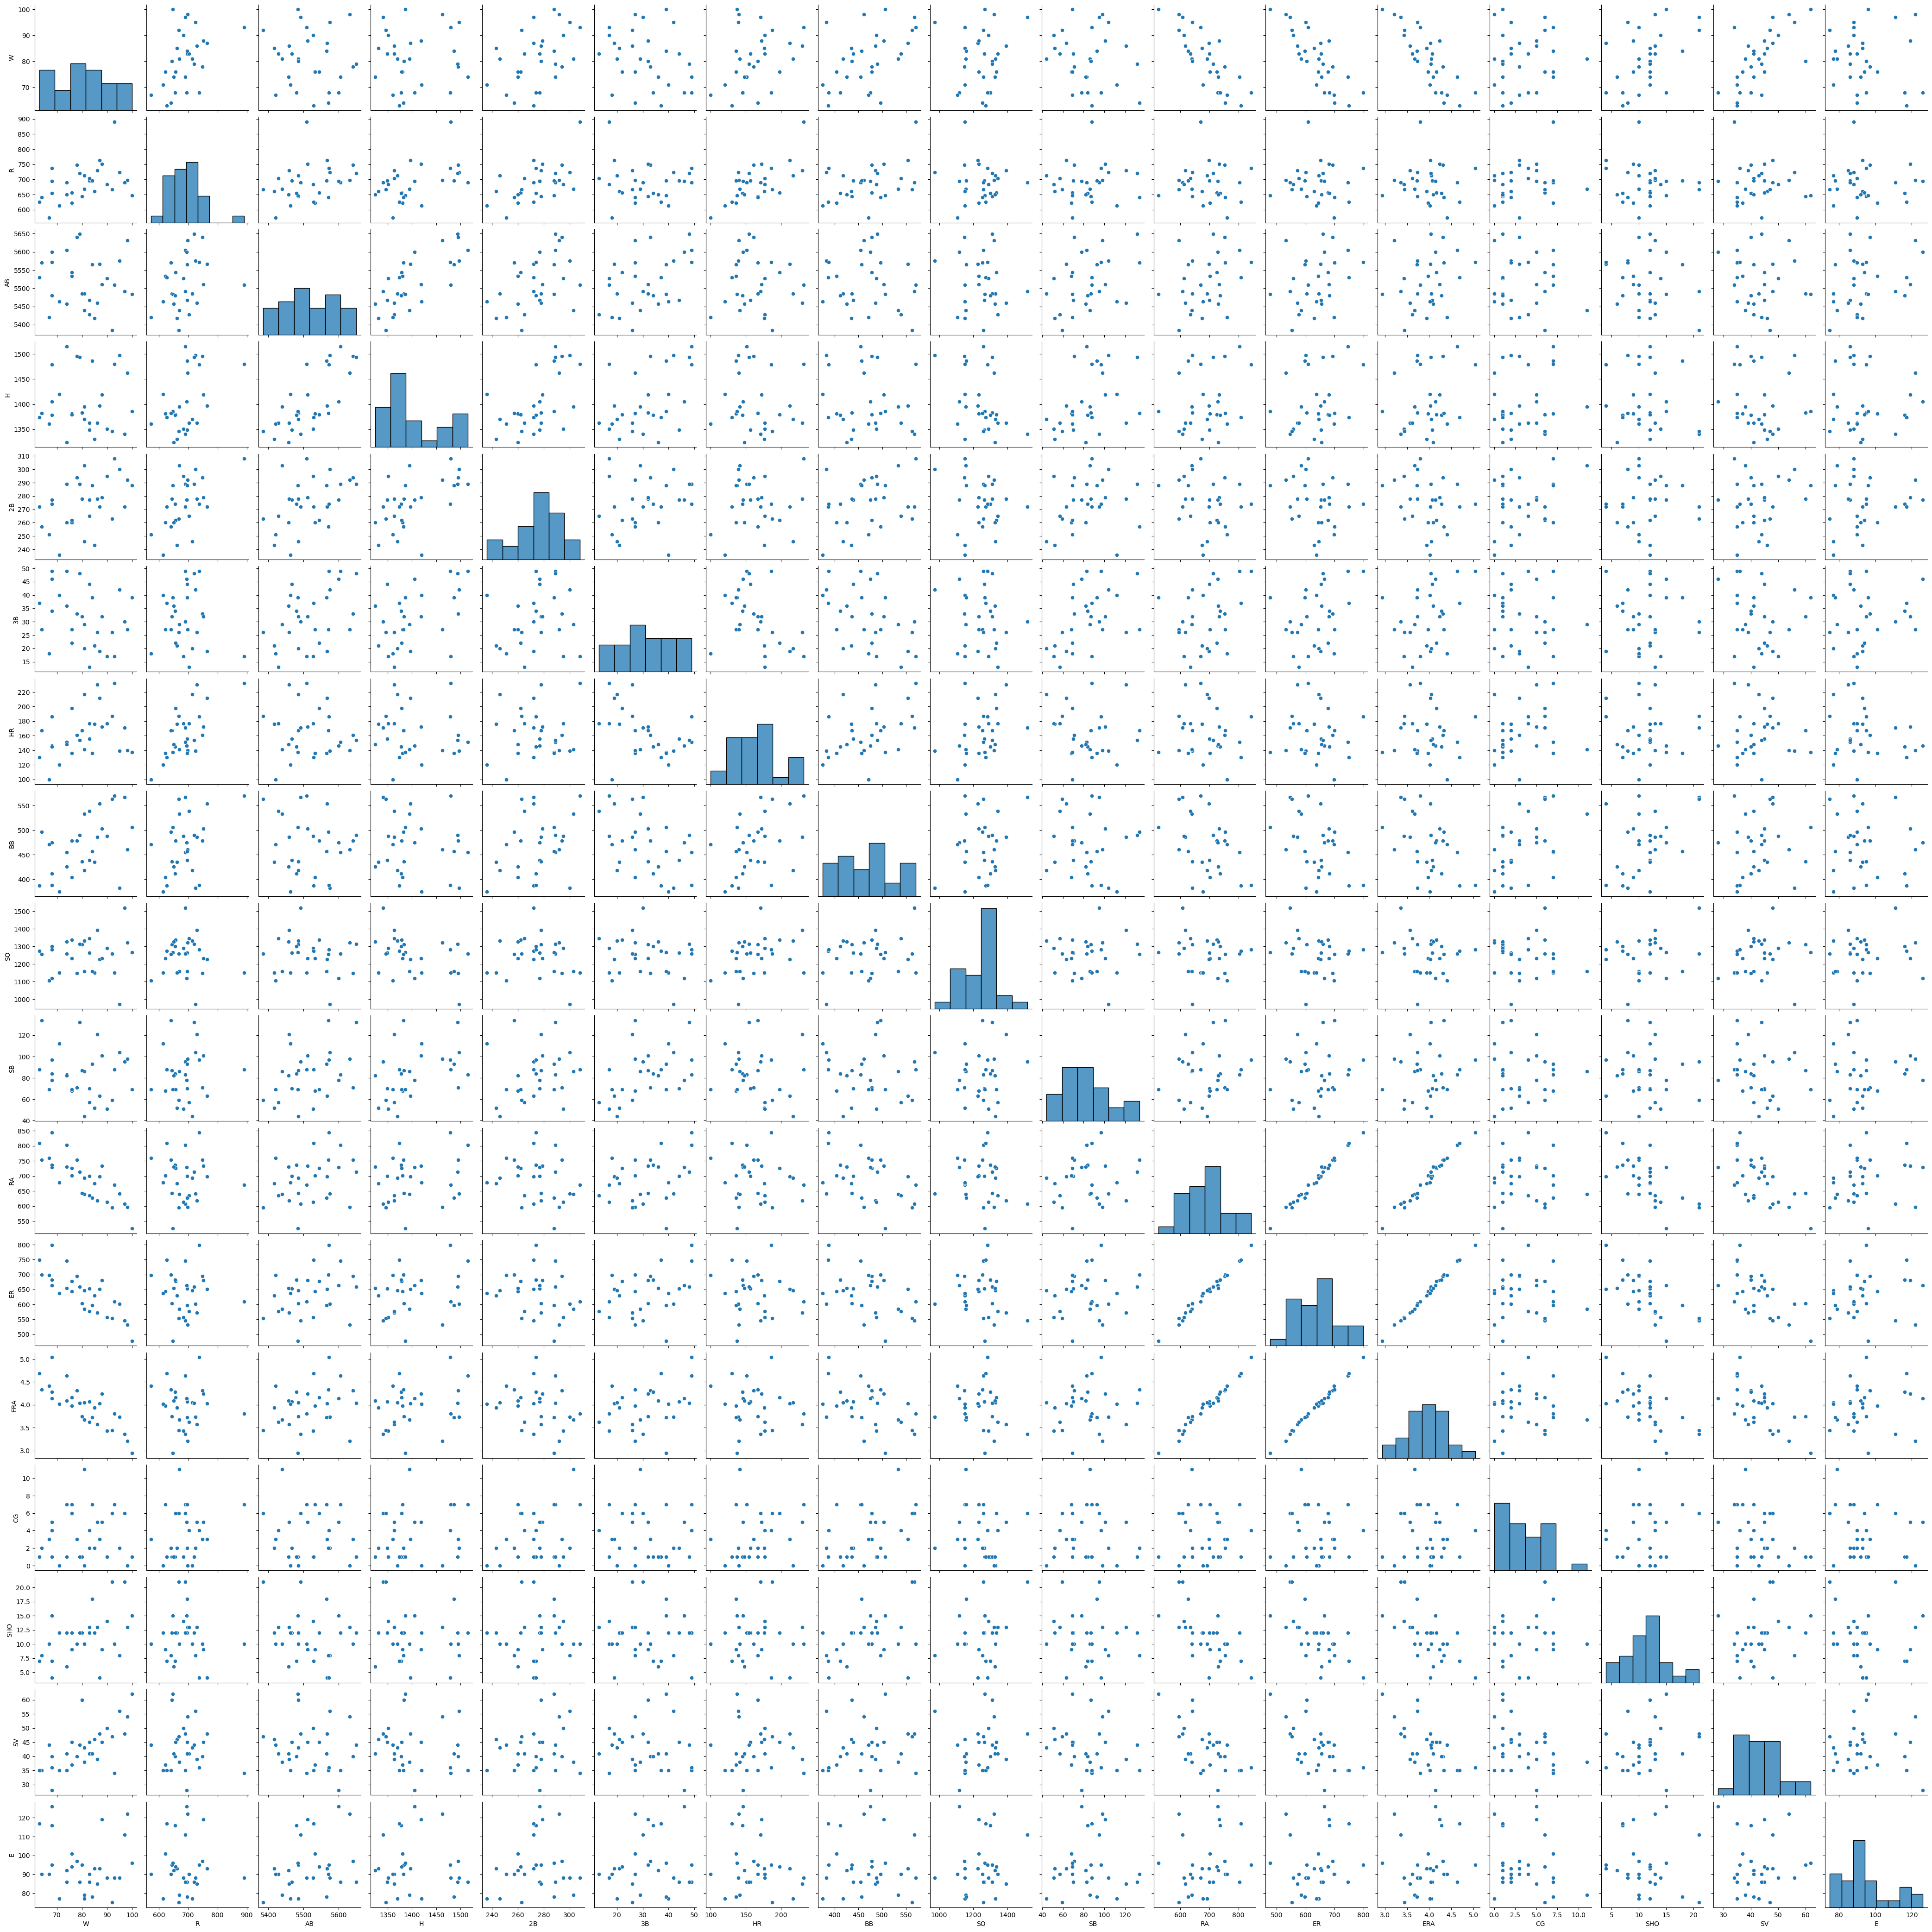

In [116]:
sns.pairplot(palette = 'Dark2', data = baseball_df)

In [118]:
baseball_df.shape

(30, 17)

## Check for Multicollinearity

## Data Correlation find - whether we need all 17 columns

In [120]:
baseball_df.shape

(30, 17)

In [121]:
# get coefficient of one variable with all the other variables

cor = baseball_df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


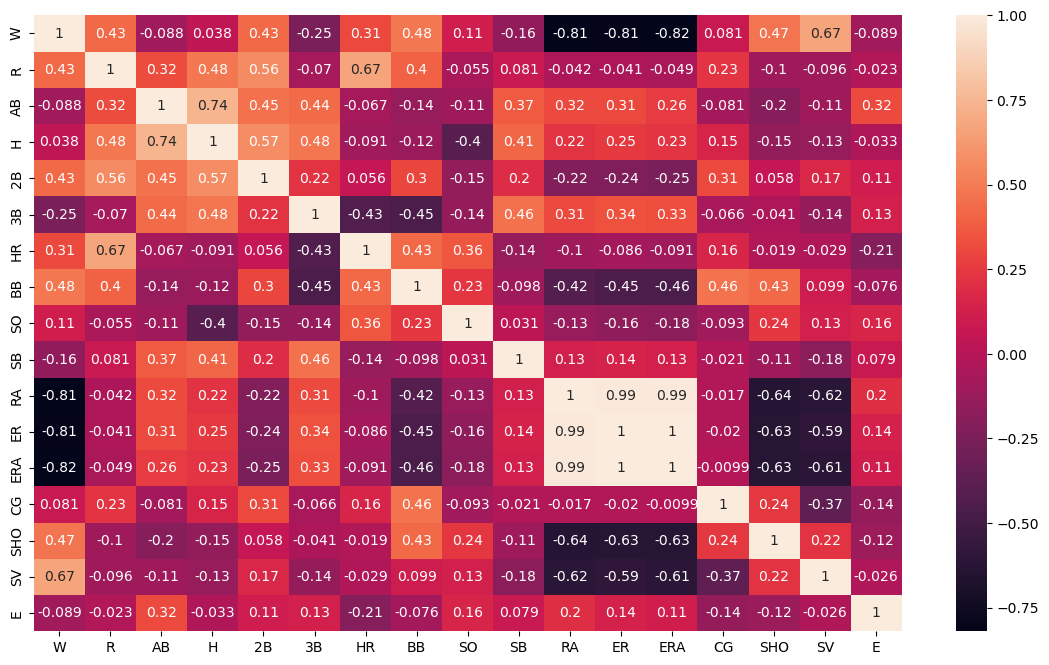

In [122]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'AB' v/s 'H' has more positive correlation 0.74
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

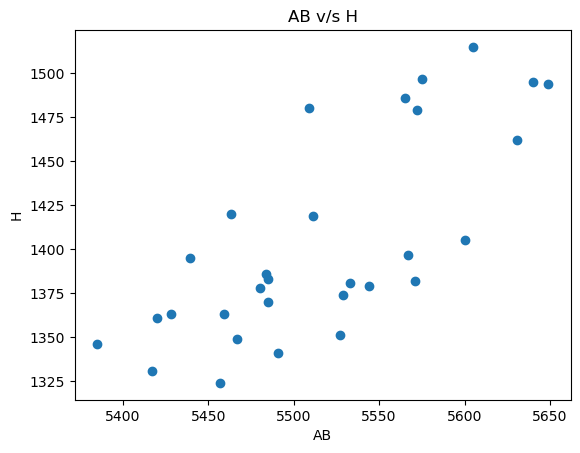

In [123]:
# one more proof so will plot scatter plot and check

plt.scatter(baseball_df['AB'], baseball_df.H)
plt.xlabel("AB")
plt.ylabel("H")
plt.title("AB v/s H")
plt.show()

Observation:
            1. feature v/s feature - 'AB' v/s 'H' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'AB' increases 'H' value increases - positive correlation

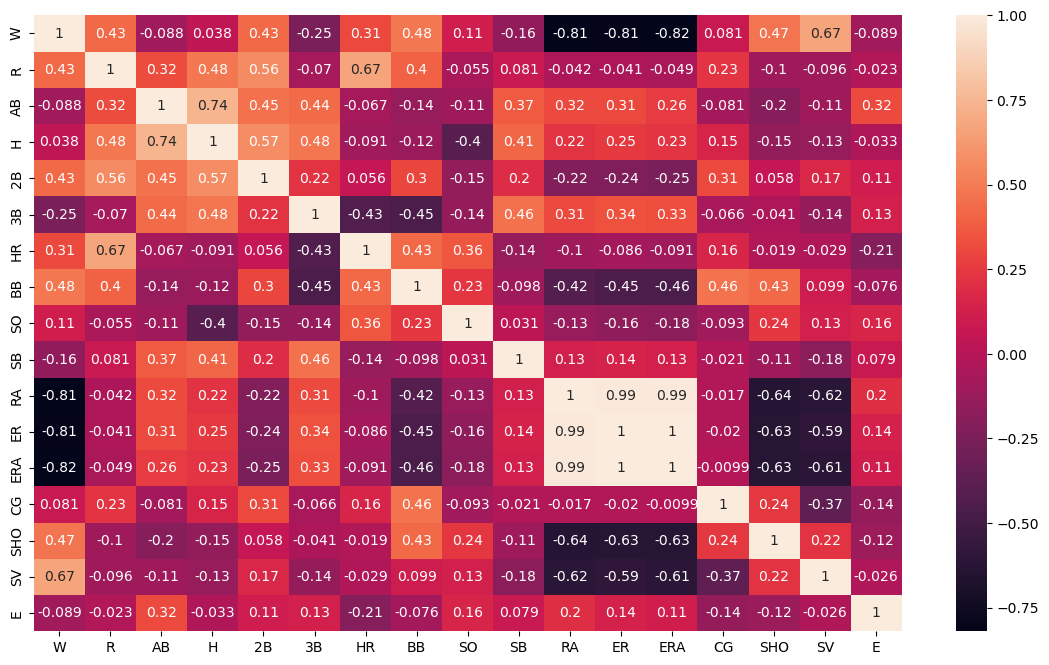

In [124]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'AB' v/s 'W' is -0.088 and 'H' v/s 'W' is 0.038 from this heatmap 
                we get to know 'H' is contributing more to 'W' than 'AB'. 
                so we can remove 'AB' feature.

In [125]:
baseball_df.drop(columns = ['AB'], axis = 1, inplace = True)
baseball_df

,W,R,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [126]:
baseball_df.shape

(30, 16)

In [127]:
baseball_df.corr().W.sort_values(ascending = False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

## Seperating features and target

In [128]:
baseball_df.columns

Index(['W', 'R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [129]:
x = baseball_df.drop(['W'], axis = 1) 
y = baseball_df['W']

In [130]:
x.head()

,R,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [131]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [132]:
x.shape

(30, 15)

In [133]:
y.shape

(30,)

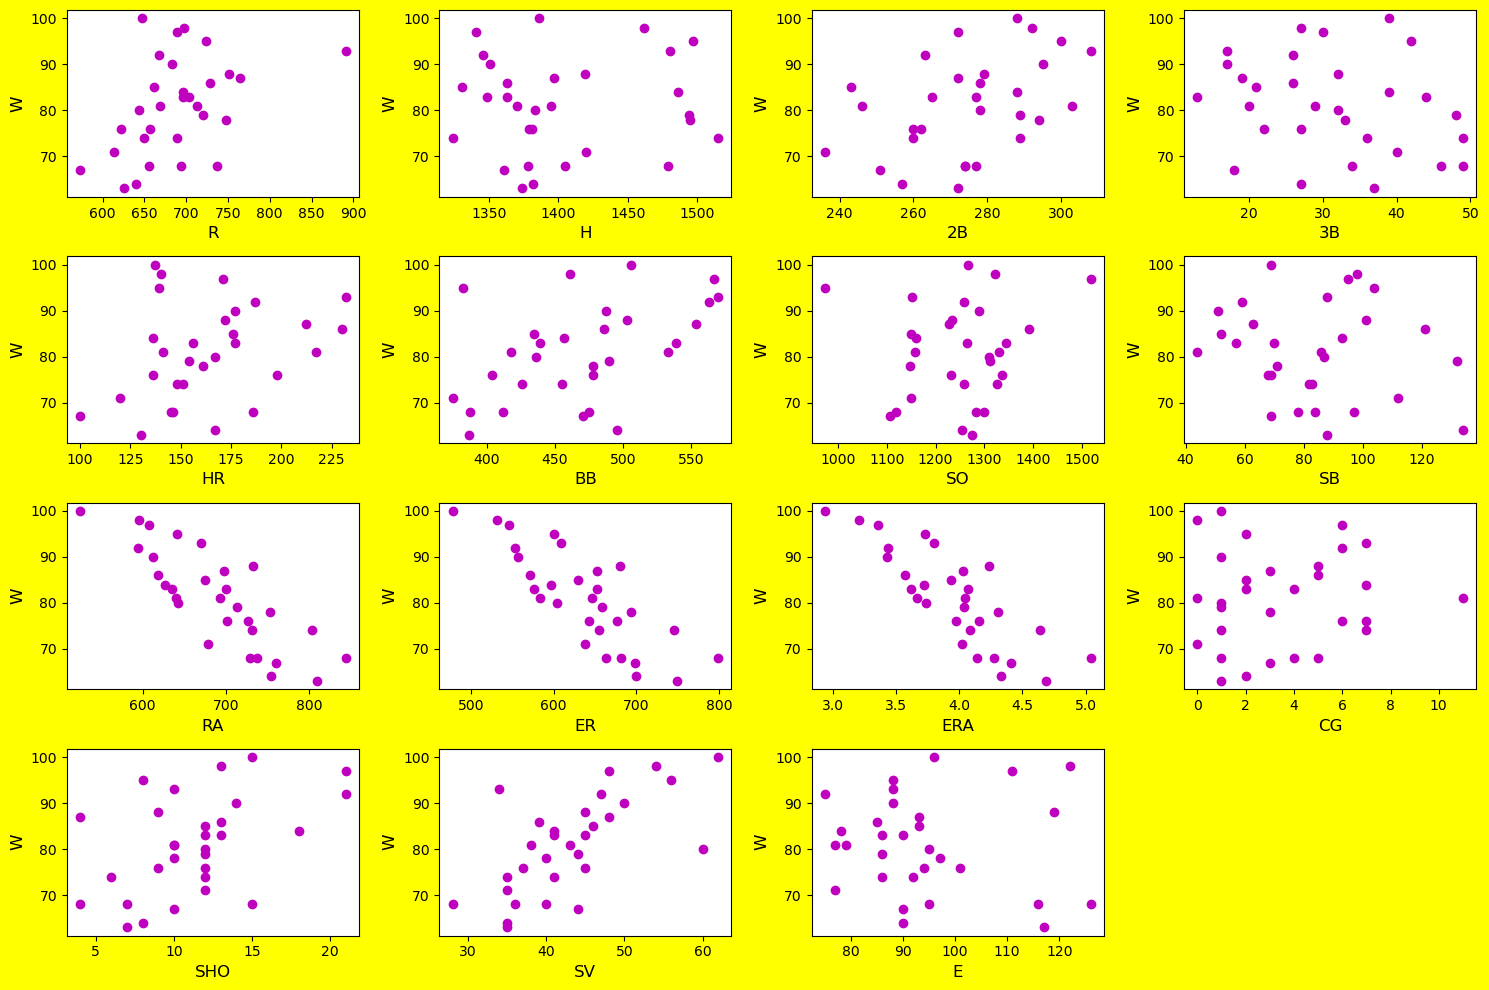

In [134]:
# lets check the relation between all the features and labels

plt.figure(figsize=(15,10), facecolor = 'yellow')
p = 1
for i in x:
    if p <= 16:
        ax = plt.subplot(4, 4, p)
        plt.scatter(x[i], y, color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.ylabel('W', fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Looks like almost all features are correlated with label 'W'. 

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [135]:
x.columns

Index(['R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')

In [136]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[ 0.61907797,  1.66368512,  1.42017307,  1.04119304, -0.7872986 ,
        -1.53490242, -2.69762957,  0.91388329, -0.66623393, -0.50511008,
        -0.50695519, -0.5398062 , -0.81462859,  1.67160651, -0.46146963],
       [ 0.13443166, -0.97068076,  0.12740339,  1.23580856, -0.24396668,
        -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,  0.24892985,
         0.25459752, -0.5398062 ,  0.1728    ,  0.24987932, -0.60719689],
       [-0.33290586, -0.15189137,  1.58879521, -0.22380785, -0.7233772 ,
         1.13914361, -0.89398189,  0.11144918, -0.68033909, -0.75162313,
        -0.64134684,  2.77264091, -0.32091429, -0.65485616, -1.11724227],
       [-1.14641931, -0.40108814, -0.82812203, -0.41842337, -0.8831807 ,
        -1.16053598, -0.16860185, -0.69098493,  0.18007593,  0.10392217,
         0.05301004,  1.3004422 , -0.56777144, -0.78410408,  0.48575751],
       [ 0.01327008,  1.98408098,  0.80189192,  1.72234737, -0.40377019,
        -0.25136033,  0.10586628, -0.02228984, 

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,11.264134,R
1,5.985846,H
2,3.711843,2B
3,3.187278,3B
4,10.026774,HR
5,3.776447,BB
6,2.652161,SO
7,1.912825,SB
8,185.181393,RA
9,740.214817,ER


In [ ]:
Observation: 
            1. The threshold VIF value is 10 and any feature > 10 VIF value has high correlation with 
               other features. Here we can observe some features are > than the threshold value. 
               so there is multicollinearity problem. 
            2. We will remove the features 'RA', 'ER' and 'ERA' as they have very high VIF values

In [138]:
baseball_df.drop(columns = ['RA', 'ER', 'ERA'], axis = 1, inplace = True)


In [139]:
baseball_df.head()

,W,R,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,1515,289,49,151,455,1259,83,7,12,35,86


In [140]:
baseball_df.shape

(30, 13)

## Checking Outliers

In [141]:
baseball_df.columns

Index(['W', 'R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO', 'SV',
       'E'],
      dtype='object')

In [142]:
# we dont check outliers for labels - so remove the label

baseball_df_features = baseball_df.drop(['W'], axis = 1)

In [143]:
baseball_df_features.shape

(30, 12)

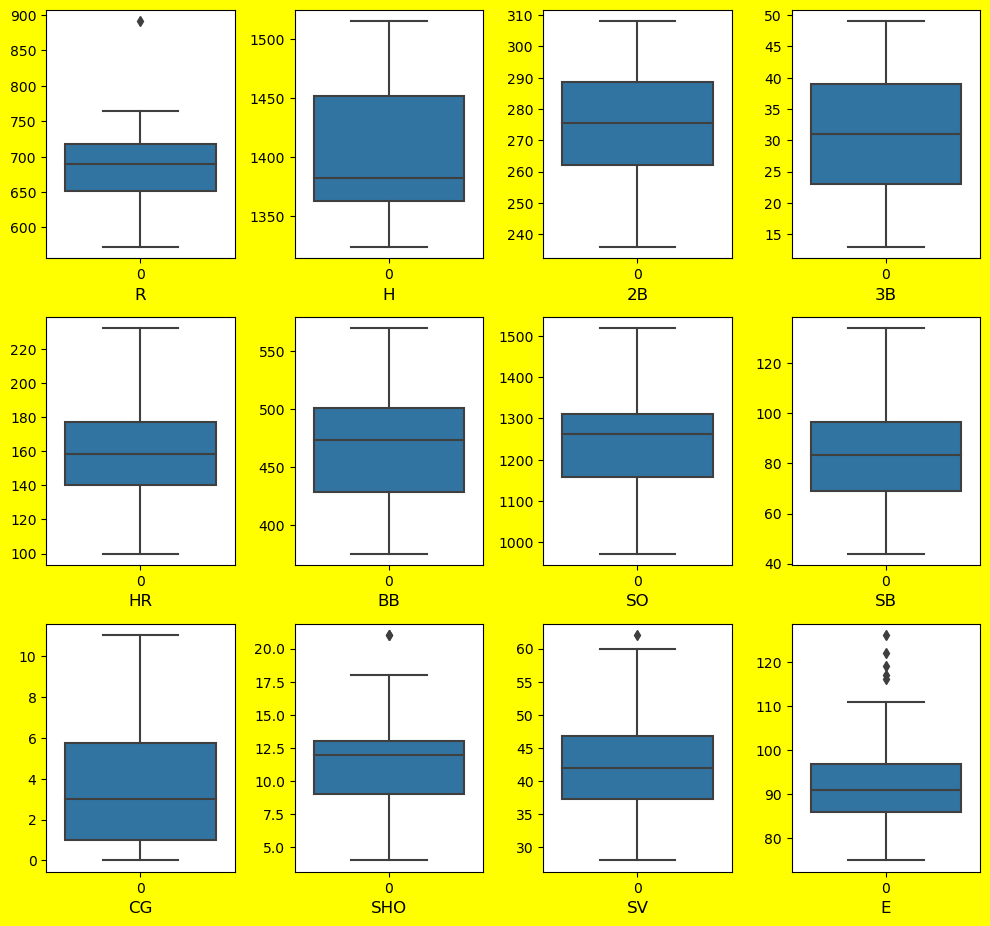

In [144]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in baseball_df_features:
    if p <= 13:
        ax = plt.subplot(4, 4, p)
        sns.boxplot(data = baseball_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

observations:
            1. More Outliers found in feature - 'E'
            2. This outliers are right skewed (i.e. outliers are above max value)
            3. As we have very less samples we are not going to remove the outliers

## Checking for Skewness

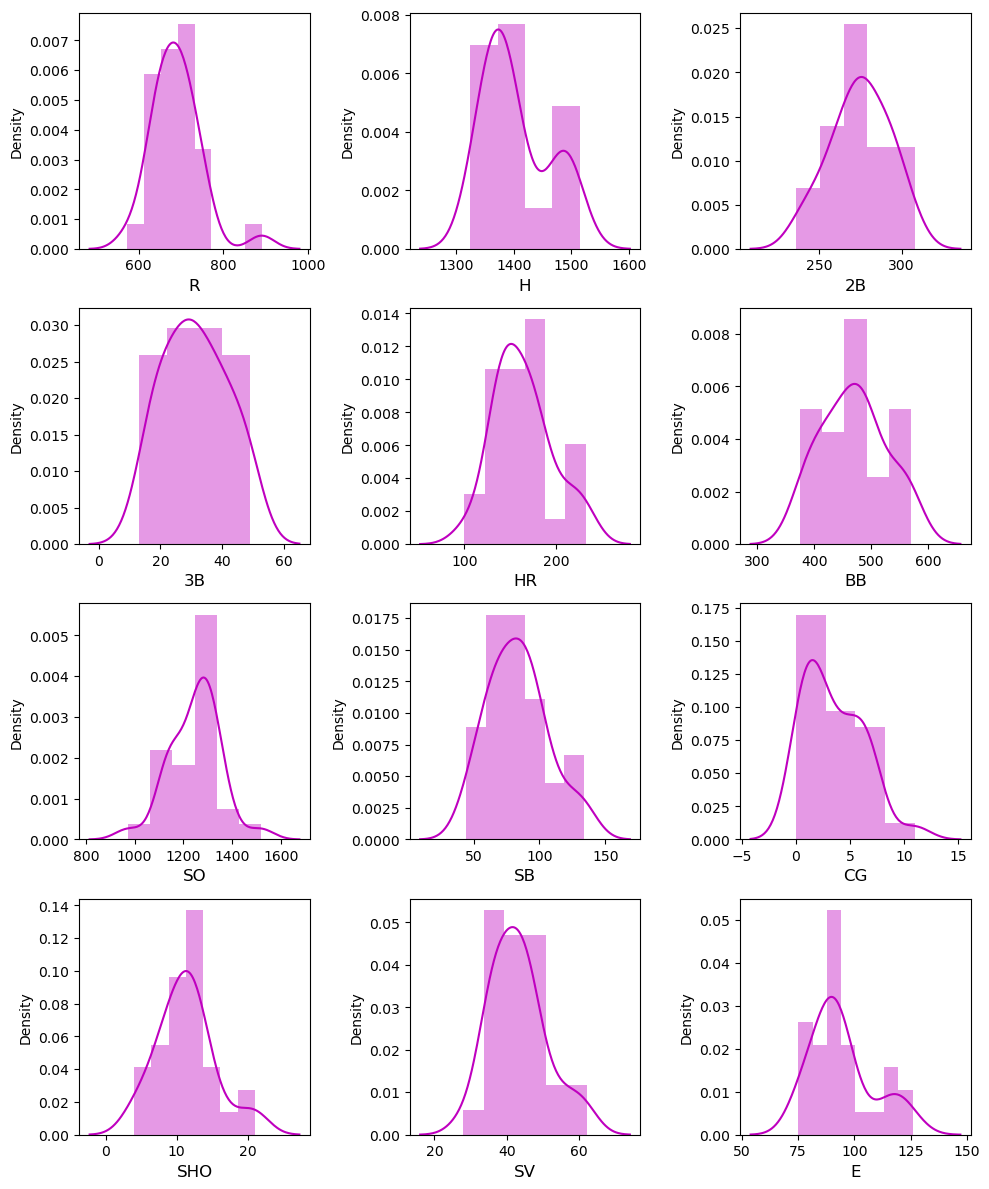

In [145]:
# how the data is distributed

plt.figure(figsize=(10,12))
p = 1
for i in baseball_df_features:
    if p <= 12:
        ax = plt.subplot(4, 3, p)
        sns.distplot(baseball_df_features[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [146]:
baseball_df.skew() # not in the range -0.5 to +0.5

W      0.047089
R      1.200786
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [147]:
# removing for skewness

baseball_df['R'] = np.cbrt(baseball_df['R'])

baseball_df['H'] = np.cbrt(baseball_df['H'])

baseball_df['CG'] = np.cbrt(baseball_df['CG'])

baseball_df['SV'] = np.cbrt(baseball_df['SV'])

baseball_df['E'] = np.cbrt(baseball_df['E'])

In [148]:
baseball_df.skew() 

W      0.047089
R      0.892970
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG    -1.043632
SHO    0.565790
SV     0.325143
E      0.719735
dtype: float64

In [ ]:
Observation:
            1. Some features - there are skewness.

## Modelling

In [149]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [150]:
baseball_df.shape

(30, 13)

In [151]:
x = baseball_df.drop(['W'], axis = 1) 
y = baseball_df['W']

In [152]:
x.shape

(30, 12)

In [153]:
y.shape

(30,)

In [154]:
# Feature Scaling using Standard Scalarization

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[ 0.65095926,  1.65419886,  1.42017307,  1.04119304, -0.7872986 ,
        -1.53490242, -2.69762957,  0.91388329, -0.12992839, -0.81462859,
         1.61381405, -0.43922781],
       [ 0.16471023, -0.97802745,  0.12740339,  1.23580856, -0.24396668,
        -0.5365919 ,  0.15487844, -0.60182558, -0.12992839,  0.1728    ,
         0.30978586, -0.59778474],
       [-0.31668503, -0.14012895,  1.58879521, -0.22380785, -0.7233772 ,
         1.13914361, -0.89398189,  0.11144918,  1.5776798 , -0.32091429,
        -0.63522407, -1.17291256],
       [-1.18654368, -0.39316603, -0.82812203, -0.41842337, -0.8831807 ,
        -1.16053598, -0.16860185, -0.69098493,  1.02672842, -0.56777144,
        -0.77947662,  0.53694673],
       [ 0.04111683,  1.96230885,  0.80189192,  1.72234737, -0.40377019,
        -0.25136033,  0.10586628, -0.02228984,  1.02672842,  0.1728    ,
        -1.07597374, -0.59778474],
       [ 3.3177775 ,  1.36092994,  1.86983209, -1.39150098,  2.18504658,
         1.79874163, -

In [155]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 348)

## Linear Regression

In [156]:
model_LR = LinearRegression()

In [157]:
model_LR.fit(x_train , y_train)

LinearRegression()

## Lets check how well model fits on train data

In [158]:
model_LR.score(x_train, y_train)

0.8668916053597362

## Lets check how well model fits on test data

In [159]:
model_LR.score(x_test, y_test)

0.8316535891395938

In [160]:
y_pred = model_LR.predict(x_test)
y_pred

array([90.28008111, 96.2478257 , 75.06698341, 68.32840473, 74.61975926,
       89.90164274, 84.27300289, 89.4199983 ])

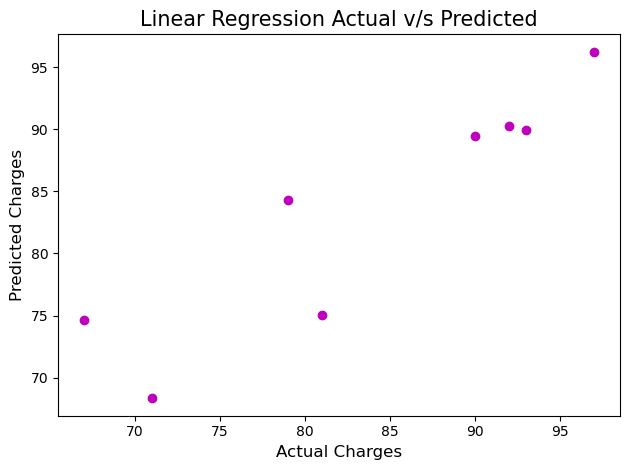

In [161]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title('Linear Regression Actual v/s Predicted', fontsize=15)
plt.tight_layout()

Observation:
            1. we are able to see good number of samples are following linear curve

In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [163]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  83.16535891395938
MAE  3.4559782704757698
MSE  17.707938092378985
RMSE  4.208080095765643


## Random Forest Regression

In [164]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state = 348)

In [169]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train1, y_train1)

RandomForestRegressor()

In [170]:
pred_RFR = RFR.predict(x_test1)
pred_RFR

array([82.17, 82.69, 81.01, 72.97, 81.4 , 76.2 , 86.  , 85.91])

In [171]:
## Lets check how well model fits on train data

RFR.score(x_train1, y_train1)

0.914055235586179

In [172]:
## Lets check how well model fits on test data

RFR.score(x_test1, y_test1)

-0.022714319667260785

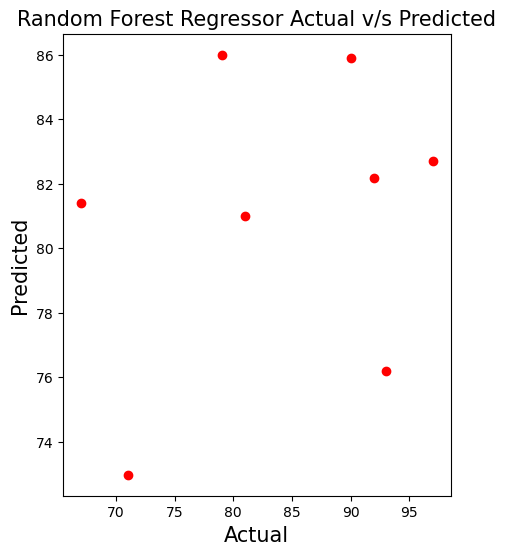

In [173]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test1, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. We are able to see samples are not following linear curve
            2. with less number of samples it is not able to learn

In [174]:
print("r2_score on test data ", r2_score(y_test1, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test1, pred_RFR))

print("MSE ", mean_squared_error(y_test1, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test1, pred_RFR)))

r2_score on test data  -2.2714319667260785
MAE  8.551250000000001
MSE  107.5767625
RMSE  10.371921832524578


## KNN Regressor

In [175]:
from sklearn.neighbors import KNeighborsRegressor

In [176]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [177]:
pred_knn = knn.predict(x_test)
pred_knn

array([85.4, 85. , 79. , 70.4, 75.8, 84.4, 78.4, 84.4])

In [178]:
## Lets check how well model fits on train data

knn.score(x_train, y_train)

0.5342928361536123

In [179]:
## Lets check how well model fits on test data

knn.score(x_test, y_test)

0.5543196672608441

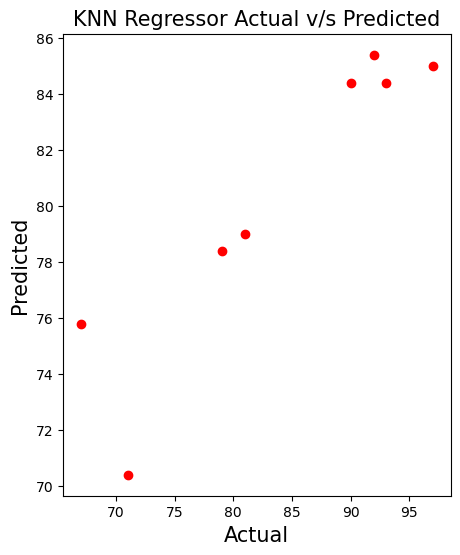

In [180]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_knn, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('KNN Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

In [181]:
print("r2_score on test data ", r2_score(y_test, pred_knn) * 100)

print("MAE ", mean_absolute_error(y_test, pred_knn))

print("MSE ", mean_squared_error(y_test, pred_knn))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_knn)))

r2_score on test data  55.43196672608441
MAE  5.599999999999996
MSE  46.87999999999996
RMSE  6.846897107449473


## Ridge Regression

In [182]:
from sklearn.linear_model import Ridge

In [183]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [184]:
pred_ridge = ridge.predict(x_test)
pred_ridge

array([90.67772007, 91.927173  , 78.44996807, 67.24942476, 75.32241662,
       90.41948959, 82.9560021 , 91.91699054])

In [185]:
## Lets check how well model fits on train data

ridge.score(x_train, y_train)

0.8552223230029301

In [186]:
## Lets check how well model fits on test data

ridge.score(x_test, y_test)

0.8297113093997013

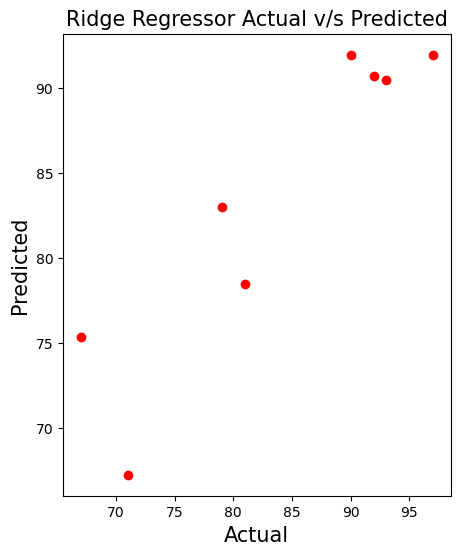

In [187]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_ridge, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Ridge Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are following linear curve

In [188]:
print("r2_score on test data ", r2_score(y_test, pred_ridge) * 100)

print("MAE ", mean_absolute_error(y_test, pred_ridge))

print("MSE ", mean_squared_error(y_test, pred_ridge))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_ridge)))

r2_score on test data  82.97113093997012
MAE  3.6839542210000715
MSE  17.912241642518914
RMSE  4.232285628654913


Observation:
            1. Linear Regression model has higher testing accuracy - 0.8316. So we use this model.
            2. Ridge and Linear Regression has almost same accuracy so our model is not overfitted

## Saving the model

In [189]:
import pickle
filename = "Baseball_LR_Model.pkl"
pickle.dump(model_LR, open(filename, 'wb'))

## Predict the saved model

In [190]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Baseball_LR_Model.pkl', 'rb'))

result1 = loaded_model1.score(x_test, y_test)
print(result1)

0.8316535891395938


In [191]:
compare = pd.DataFrame([loaded_model1.predict(x_test)[:], y_test[:]], index=['Predicted', 'Original'])
compare

,0,1,2,3,4,5,6,7
Predicted,90.280081,96.247826,75.066983,68.328405,74.619759,89.901643,84.273003,89.419998
Original,92.000000,97.000000,81.000000,71.000000,67.000000,93.000000,79.000000,90.000000


Observation:
            1. Actual and predicted values almost matches
            2. This Baseball_LR_Model.pkl can be used to predict the Number of wins - 'W'

Observation:
            1. Linear Regression model - testing accuracy       - 83.16% 
            2. Random Forest Regressor model - testing accuracy - -2.271
            3. KNN Regressor model - testing accuracy           - 55.43%
            4. Ridge Regression model - testing accuracy        - 82.97%
            5. Comparing both the models - Linear Regression model has the higher accuracy - 83.16% 
               and our model is not overfitted 